## Model Improvement - Finetune

## 1)Connect to the data

In [ ]:
#20191013,20171105,20191001,20171007
label_date = ['20171105','20191013','20191001','20171007']#flood

unlabel_date = ['20171111','20190803','20190807','20191005','20191013','20191014','20191017']

#### load the file directories

In [ ]:
# Load file paths to fnames list object...
import os

base_path = '/content/drive/MyDrive/KPMG Practicum/PlanetData/dataset/'
categories_pse = ['label', 'unlabel']

fnames_pse = []
n_image_l_pse = []

for category in categories_pse:

  if category == 'label':
    datelist = label_date
  if category == 'unlabel':
    datelist = unlabel_date
  
  for date in datelist:
    image_folder = os.path.join(base_path, date, 'files')
    print(image_folder)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names if file_name[-36:] == '3B_AnalyticMS_SR_harmonized_clip.tif' or file_name[-18:] == '3B_Visual_clip.tif']
    n_image = len(full_path)
    n_image_l_pse.append(n_image)
    fnames_pse.append(full_path)

#print('number of images for each category:', [len(f) for f in fnames])
#print(fnames[0:4]) # Examples of file names...

/content/drive/MyDrive/KPMG Practicum/PlanetData/dataset/20171105/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/dataset/20191013/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/dataset/20191001/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/dataset/20171007/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/dataset/20171111/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/dataset/20190803/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/dataset/20190807/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/dataset/20191005/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/dataset/20191013/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/dataset/20191014/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/dataset/20191017/files


In [ ]:
# Load file paths to fnames list object...
import os

base_path = '/content/drive/MyDrive/KPMG Practicum/PlanetData/non_flood/'

fnames_pse_non_flood = []
n_image_l_pse_non_flood = []

fl = os.listdir(base_path)

for f in fl:
  image_folder = os.path.join(base_path, f, 'files')
  print(image_folder)
  file_names = os.listdir(image_folder)
  full_path = [os.path.join(image_folder, file_name) for file_name in file_names if file_name[-36:] == '3B_AnalyticMS_SR_harmonized_clip.tif' or file_name[-18:] == '3B_Visual_clip.tif']
  n_image = len(full_path)
  n_image_l_pse_non_flood.append(n_image)
  fnames_pse_non_flood.append(full_path)


/content/drive/MyDrive/KPMG Practicum/PlanetData/non_flood/RuiLu_20200622/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/non_flood/RuiLu_20200219/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/non_flood/RuiLu_20200206/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/non_flood/YangHu_20201011/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/non_flood/YangHu_20201211/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/non_flood/YangHu_20200828/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/non_flood/CeceGu_20211230/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/non_flood/CeceGu_20210604/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/non_flood/CeceGu_20210710/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/non_flood/CeceGu_20211117/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/non_flood/CeceGu_20210309/files
/content/drive/MyDrive/KPMG Practicum/PlanetData/non_flood/CeceGu_20211206/files
/content/drive/MyDrive/KPMG Pra

In [ ]:
n_label_date = len(label_date)
fnames_labeled = fnames_pse[:n_label_date]

In [ ]:
n_unlabel_date = len(label_date)
fnames_unlabeled = fnames_pse[n_label_date:]

#### load the image data directories

In [ ]:
l_image_dir_pse = []
for l in fnames_pse:
  l_image_dir_pse.extend(l)

In [ ]:
len(l_image_dir_pse)

543

In [ ]:
l_image_dir_labeled = []
for l in fnames_labeled:
  l_image_dir_labeled.extend(l)

In [ ]:
len(l_image_dir_labeled)

193

In [ ]:
l_image_dir_unlabeled = []
for l in fnames_unlabeled:
  l_image_dir_unlabeled.extend(l)

In [ ]:
len(l_image_dir_unlabeled)

350

In [ ]:
l_image_dir_pse_non_flood = []
for l in fnames_pse_non_flood:
  l_image_dir_pse_non_flood.extend(l)

In [ ]:
len(l_image_dir_pse_non_flood)

925

## 2) Preprocess the data

In [ ]:
def preprocessor(data, shape=(244, 244)):
        """
        This function preprocesses reads in images, resizes them to a fixed shape and
        min/max transforms them before converting feature values to float32 numeric values
        required by onnx files.
        
        params:
            data
                list of unprocessed images
                      
        returns:
            X
                numpy array of preprocessed image data
                  
        """
           
        import cv2
        import numpy as np

        "Resize a color image and min/max transform the image"
        img = cv2.imread(data) # Read in image from filepath.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2 reads in images in order of blue green and red, we reverse the order for ML.
        img = cv2.resize(img, shape, interpolation = cv2.INTER_CUBIC) # Change height and width of image.
        img = img / 255.0 # Min-max transform.


        # Resize all the images...
        X = np.array(img)
        X = np.expand_dims(X, axis=0) # Expand dims to add "1" to object shape [1, h, w, channels].
        X = np.array(X, dtype=np.float32) # Final shape for onnx runtime.
        return X

#### Preprocess the labeled data

**The following cell may take ~6 minutes**

In [ ]:
# Import image, load to array of shape height, width, channels, then min/max transform...

# Read in all images from filenames...
preprocessed_image_data_labeled = [preprocessor(x) for x in l_image_dir_labeled] 

# tf.keras models require object to be an array rather than a list. (vstack converts above list to array object.)
import numpy as np
X_labeled = np.vstack(preprocessed_image_data_labeled) # Assigning to X to highlight that this represents feature input data for our model.

In [ ]:
train_images = X_labeled

In [ ]:
train_images.shape

(193, 244, 244, 3)

In [ ]:
len_X_labeled = train_images.shape[0] #labeled data are all from flood days

#### Preprocess the unlabeled data
**Note: Use the same number of unlabeled images as the labeled images before pseudo labeling**

In [ ]:
count = 0
preprocessed_image_data_pse_non_flood = []
l_image_dir_pse_non_flood_2 = []

for image_dir in l_image_dir_pse_non_flood:
  print(count)
  # Use the same number of unlabeled images as the labeled images before pseudo labeling
  if count == len_X_labeled: 
    break
  try:
    tmp = preprocessor(image_dir)
    preprocessed_image_data_pse_non_flood.append(tmp)
    l_image_dir_pse_non_flood_2.append(image_dir)
    count += 1
  except:
    continue


In [ ]:
len(l_image_dir_pse_non_flood_2)

193

In [ ]:
train_images_non_flood = np.vstack(preprocessed_image_data_pse_non_flood) # Assigning to X to highlight that this represents feature input data for our model.

In [ ]:
train_images_non_flood.shape

(193, 244, 244, 3)

In [ ]:
train_images_step1 = np.concatenate((train_images, train_images_non_flood))

In [ ]:
train_images_step1.shape

(386, 244, 244, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(train_images_step1, train_labels_step1, test_size=0.20, random_state=0)
X_train.shape, y_train.shape

((308, 244, 244, 3), (308, 2))

## 3) Pseudo Labeling

#### establish the nero networks for pseudo labeling

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

In [ ]:
with tf.device('/device:GPU:0'): # "/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.
  keras_model = Sequential()
  keras_model.add(Conv2D(filters=32, kernel_size=2, strides = (3,3), padding='same', activation='relu', input_shape=[244, 244, 3]))
  keras_model.add(MaxPooling2D(pool_size=2))
  keras_model.add(Conv2D(filters=32, kernel_size=2, strides = (3,3), padding='same', activation='relu'))
  keras_model.add(MaxPooling2D(pool_size=2))

  keras_model.add(Dropout(0.2))
  keras_model.add(Flatten())
  keras_model.add(Dense(128, activation='relu')) # One fully-connected layer of 16 neurons.
  keras_model.add(Dropout(0.2))

  keras_model.add(Dense(2, activation='softmax')) # Last fully-connected layer of 2 outputs (2 categories).

  # Compile model...
  keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Fitting the NN to the Training set...
  hist = keras_model.fit(X_train, y_train,
                    epochs=10, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
10/10 [==============================] - 5s 274ms/step - loss: 0.6437 - accuracy: 0.5162 - val_loss: 0.6135 - val_accuracy: 0.4744
Epoch 2/10
10/10 [==============================] - 2s 190ms/step - loss: 0.6010 - accuracy: 0.6266 - val_loss: 0.5811 - val_accuracy: 0.5897
Epoch 3/10
10/10 [==============================] - 1s 144ms/step - loss: 0.5814 - accuracy: 0.6494 - val_loss: 0.5548 - val_accuracy: 0.6795
Epoch 4/10
10/10 [==============================] - 1s 141ms/step - loss: 0.5866 - accuracy: 0.6331 - val_loss: 0.5622 - val_accuracy: 0.7436
Epoch 5/10
10/10 [==============================] - 1s 142ms/step - loss: 0.5800 - accuracy: 0.6494 - val_loss: 0.5734 - val_accuracy: 0.6410
Epoch 6/10
10/10 [==============================] - 1s 144ms/step - loss: 0.5760 - accuracy: 0.6494 - val_loss: 0.5594 - val_accuracy: 0.7308
Epoch 7/10
10/10 [==============================] - 1s 142ms/step - loss: 0.5680 - accuracy: 0.6591 - val_loss: 0.5663 - val_accuracy: 0.6538
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


[Text(0.5, 1.0, 'MVP - before pseudo labeling')]

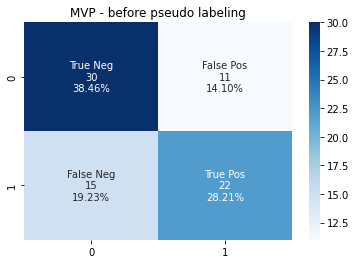

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = keras_model.predict(X_validation)

#y_pred = model.predict_generator(test_generator,steps=n_pred//10,verbose=1)

labels = (pred > 0.5).astype(np.int)

conf = confusion_matrix(y_validation.iloc[:,0], labels[:,0])
tn, fp, fn, tp = confusion_matrix(y_validation.iloc[:,0], labels[:,0]).ravel()

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf.flatten()/np.sum(conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf, annot=labels, fmt='', cmap='Blues').set(title='MVP - before pseudo labeling')

### generate pseudo labels using previous model

In [ ]:

preprocessed_image_data_unlabel = [preprocessor(x) for x in l_image_dir_unlabeled] 

# tf.keras models require object to be an array rather than a list. (vstack converts above list to array object.)
import numpy as np
unlabel_images = np.vstack(preprocessed_image_data_unlabel) # Assigning to X to highlight that this represents feature input data for our model.

In [ ]:
unlabel_images.shape

(350, 244, 244, 3)

In [ ]:
# MVP model
y_pred = (keras_model.predict(unlabel_images) > 0.5).astype("int32")

In [ ]:
y_pred

In [ ]:
train_labels_step1.shape

(386, 2)

#### merge the previous training data and pseudo-labeled data

In [ ]:
new_dataset_images = np.concatenate((train_images_step1, unlabel_images))
new_dataset_labels = np.concatenate((train_labels_step1, y_pred))

In [ ]:
new_dataset_images.shape

(736, 244, 244, 3)

In [ ]:
new_dataset_labels.shape

(736, 2)

#### Split combined data for training the final model

In [ ]:
X_train_new = np.concatenate((X_train, unlabel_images))
y_train_new = np.concatenate((y_train, y_pred))
X_validation_new = X_validation
y_validation_new = y_validation
X_train_new.shape, y_train_new.shape, X_validation_new.shape, y_validation_new.shape


((658, 244, 244, 3), (658, 2), (78, 244, 244, 3), (78, 2))

## 4) Model

#### Model Structure

In [ ]:
from tensorflow.keras.optimizers import Adam

# Create a Function that Builds the Model
def compile_model(learn_rate = 0.001, filter_number = 32, kernel_number = 2, d_strides = (3,3), activation_fun1 = 'relu', activation_fun2 = 'relu', d_pool_size = 2, neuron = 128):

    with tf.device('/device:GPU:0'): # "/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.
      keras_model = Sequential()
      keras_model.add(Conv2D(filters=filter_number, kernel_size=kernel_number, strides = d_strides, padding='same', activation=activation_fun1, input_shape=[244, 244, 3]))
      keras_model.add(MaxPooling2D(pool_size=2))
      keras_model.add(Conv2D(filters=filter_number, kernel_size=kernel_number, strides = d_strides, padding='same', activation=activation_fun1))
      keras_model.add(MaxPooling2D(pool_size=2))

      keras_model.add(Dropout(0.2))
      keras_model.add(Flatten())
      keras_model.add(Dense(neuron, activation=activation_fun2)) # One fully-connected layer of 16 neurons.
      keras_model.add(Dropout(0.2))

      keras_model.add(Dense(d_pool_size, activation='softmax')) # Last fully-connected layer of 2 outputs (2 categories).

      # Compile model...
      keras_model.compile(loss='binary_crossentropy', optimizer= Adam(learning_rate = learn_rate), metrics=['accuracy'])
    return keras_model

In [ ]:
model = compile_model(learn_rate = 0.001, filter_number = 32, kernel_number = 2, d_strides = (3,3), activation_fun1 = 'relu', activation_fun2 = 'relu', d_pool_size = 2, neuron = 128)
hist = model.fit(X_train_new, y_train_new,
                    epochs=5, batch_size = 28, validation_data=(X_validation_new, y_validation_new))

Epoch 1/5
24/24 [==============================] - 4s 130ms/step - loss: 0.6504 - accuracy: 0.6398 - val_loss: 0.5756 - val_accuracy: 0.6667
Epoch 2/5
24/24 [==============================] - 3s 121ms/step - loss: 0.5404 - accuracy: 0.7432 - val_loss: 0.7025 - val_accuracy: 0.5641
Epoch 3/5
24/24 [==============================] - 3s 121ms/step - loss: 0.4929 - accuracy: 0.7690 - val_loss: 0.6364 - val_accuracy: 0.7051
Epoch 4/5
24/24 [==============================] - 3s 121ms/step - loss: 0.4541 - accuracy: 0.8191 - val_loss: 0.6391 - val_accuracy: 0.6795
Epoch 5/5
24/24 [==============================] - 3s 120ms/step - loss: 0.4466 - accuracy: 0.8237 - val_loss: 0.7144 - val_accuracy: 0.6154


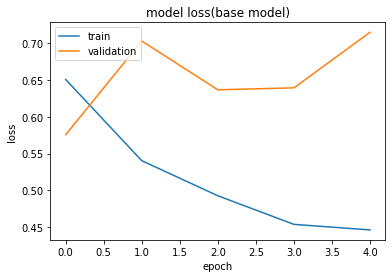

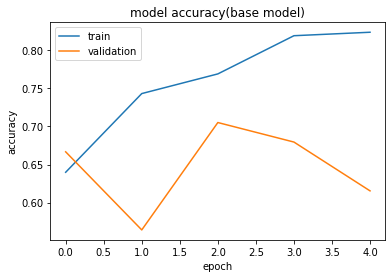

In [ ]:
import matplotlib.pyplot as plt
""" Plot the train and validation Loss """

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss(base model)')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.4,0.8)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

""" Plot the train and validation Accuracy """

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy(base model)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim(0.5,0.8)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


[Text(0.5, 1.0, 'MVP - without preprocessing')]

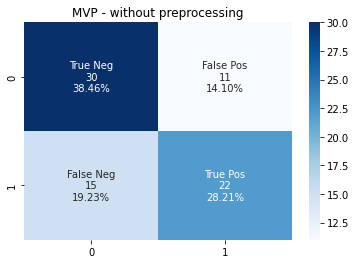

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = model.predict(X_validation_new)

#y_pred = model.predict_generator(test_generator,steps=n_pred//10,verbose=1)

labels = (pred > 0.5).astype(np.int)

conf = confusion_matrix(y_validation_new.iloc[:,0], labels[:,0])
tn, fp, fn, tp = confusion_matrix(y_validation_new.iloc[:,0], labels[:,0]).ravel()

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf.flatten()/np.sum(conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf, annot=labels, fmt='', cmap='Blues').set(title='MVP - without preprocessing')

### Model Finetuning

### Convolutional Layer

#### Learning Rate

In [ ]:
# Let's build a convnet model...
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# Establish the Model Our New Function will Inform
basemodel = compile_model()

# Define the Grid Search Parameters
learn_rate = [0.00001, 0.0001, 0.001, 0.01, 0.02, 0.05, 0.1]

# Set Dictionary for the Parameters
param_grid = dict(learn_rate=learn_rate) 

# Call the new Model Function in the KerasClassifier Package 
model = KerasClassifier(build_fn = compile_model, verbose=0) 

# Use n_jobs=-1 to Parallelize Across Available Processors (to speed it up)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid = grid.fit(X_train_new, y_train_new)

# Print Best Training Results
print("Best score is {:.2f},".format(grid.best_score_),"Best parameter is {}".format(grid.best_params_))

# Summarize Training Results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{:.4f} ({:.4f}) with {}".format(mean, stdev, param))

Best score is 0.69, Best parameter is {'learn_rate': 0.001}
0.4910 (0.0490) with {'learn_rate': 1e-05}
0.5227 (0.0598) with {'learn_rate': 0.0001}
0.6887 (0.0814) with {'learn_rate': 0.001}
0.6761 (0.0821) with {'learn_rate': 0.01}
0.6779 (0.1042) with {'learn_rate': 0.02}
0.5910 (0.0829) with {'learn_rate': 0.05}
0.5412 (0.1048) with {'learn_rate': 0.1}


#### activation function

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# Establish the Model Our New Function will Inform
basemodel = compile_model()

# Define the Grid Search Parameters
activation_fun1 = ['relu', 'tanh', 'softmax', 'sigmoid']
activation_fun2 = ['relu', 'tanh', 'softmax', 'sigmoid']

# Set Dictionary for the Parameters
param_grid = dict(activation_fun1=activation_fun1, activation_fun2 = activation_fun2) 

# Call the new Model Function in the KerasClassifier Package 
model = KerasClassifier(build_fn = compile_model, verbose=0) 

# Use n_jobs=-1 to Parallelize Across Available Processors (to speed it up)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid = grid.fit(X_train_new, y_train_new)

# Print Best Training Results
print("Best score is {:.2f},".format(grid.best_score_),"Best parameter is {}".format(grid.best_params_))

# Summarize Training Results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{:.4f} ({:.4f}) with {}".format(mean, stdev, param))

Best score is 0.75, Best parameter is {'activation_fun1': 'relu', 'activation_fun2': 'tanh'}
0.6795 (0.0610) with {'activation_fun1': 'relu', 'activation_fun2': 'relu'}
0.7480 (0.0845) with {'activation_fun1': 'relu', 'activation_fun2': 'tanh'}
0.6277 (0.0322) with {'activation_fun1': 'relu', 'activation_fun2': 'softmax'}
0.7314 (0.1103) with {'activation_fun1': 'relu', 'activation_fun2': 'sigmoid'}
0.7037 (0.0560) with {'activation_fun1': 'tanh', 'activation_fun2': 'relu'}
0.7343 (0.0797) with {'activation_fun1': 'tanh', 'activation_fun2': 'tanh'}
0.6337 (0.0431) with {'activation_fun1': 'tanh', 'activation_fun2': 'softmax'}
0.6673 (0.0503) with {'activation_fun1': 'tanh', 'activation_fun2': 'sigmoid'}
0.5579 (0.0695) with {'activation_fun1': 'softmax', 'activation_fun2': 'relu'}
0.4893 (0.0899) with {'activation_fun1': 'softmax', 'activation_fun2': 'tanh'}
0.5579 (0.0695) with {'activation_fun1': 'softmax', 'activation_fun2': 'softmax'}
0.5579 (0.0695) with {'activation_fun1': 'softm

#### Adjusting Activation Function and learning rate

In [ ]:
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# Establish the Model Our New Function will Inform
basemodel = compile_model()

# Define the Grid Search Parameters 
learn_rate = [0.0001, 0.001, 0.01, 0.1]
activation_fun1 = ['relu', 'tanh']

param_grid = dict(learn_rate=learn_rate, activation_fun1=activation_fun1)

# Call the new Model Function in the KerasClassifier Package 
model = KerasClassifier(build_fn = compile_model, verbose=0) 

# Use n_jobs=-1 to Parallelize Across Available Processors (to speed it up)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = -1)
grid = grid.fit(X_train_new, y_train_new)

# Print Best Training Results
print("Best score is {:.4f},".format(grid.best_score_),"Best parameter is {}".format(grid.best_params_))

# Summarize Training Results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{:.4f} ({:.4f}) with {}".format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best score is 0.7541, Best parameter is {'activation_fun1': 'relu', 'learn_rate': 0.01}
0.5181 (0.1052) with {'activation_fun1': 'relu', 'learn_rate': 0.0001}
0.6963 (0.0701) with {'activation_fun1': 'relu', 'learn_rate': 0.001}
0.7541 (0.0817) with {'activation_fun1': 'relu', 'learn_rate': 0.01}
0.5488 (0.0762) with {'activation_fun1': 'relu', 'learn_rate': 0.1}
0.5469 (0.0991) with {'activation_fun1': 'tanh', 'learn_rate': 0.0001}
0.7236 (0.0547) with {'activation_fun1': 'tanh', 'learn_rate': 0.001}
0.6094 (0.1370) with {'activation_fun1': 'tanh', 'learn_rate': 0.01}
0.5549 (0.0875) with {'activation_fun1': 'tanh', 'learn_rate': 0.1}


In [ ]:
model = compile_model(learn_rate = 0.01, filter_number = 32, kernel_number = 2, d_strides = (3,3), activation_fun1 = 'relu', activation_fun2 = 'tanh', d_pool_size = 2, neuron = 128)
hist = model.fit(X_train_new, y_train_new,
                    epochs=5, batch_size = 28, validation_data=(X_validation_new, y_validation_new))

Epoch 1/5
24/24 [==============================] - 4s 129ms/step - loss: 0.6042 - accuracy: 0.6869 - val_loss: 0.5900 - val_accuracy: 0.6410
Epoch 2/5
24/24 [==============================] - 3s 119ms/step - loss: 0.5042 - accuracy: 0.7736 - val_loss: 0.6053 - val_accuracy: 0.7051
Epoch 3/5
24/24 [==============================] - 3s 120ms/step - loss: 0.5043 - accuracy: 0.7629 - val_loss: 0.5658 - val_accuracy: 0.7179
Epoch 4/5
24/24 [==============================] - 3s 119ms/step - loss: 0.4518 - accuracy: 0.7918 - val_loss: 0.6500 - val_accuracy: 0.6923
Epoch 5/5
24/24 [==============================] - 3s 118ms/step - loss: 0.4416 - accuracy: 0.8055 - val_loss: 0.7031 - val_accuracy: 0.6410


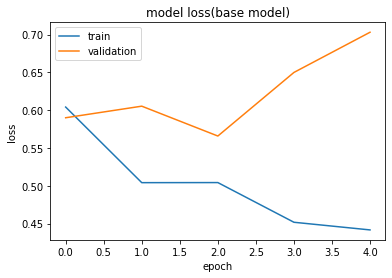

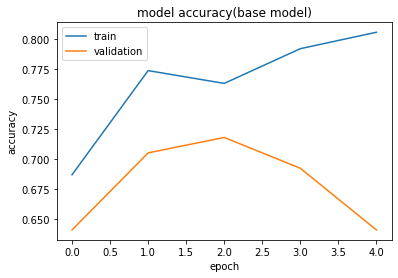

In [ ]:
import matplotlib.pyplot as plt
""" Plot the train and validation Loss """

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss(base model)')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.4,0.8)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

""" Plot the train and validation Accuracy """

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy(base model)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim(0.5,0.8)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

[Text(0.5, 1.0, 'Fine Tune1')]

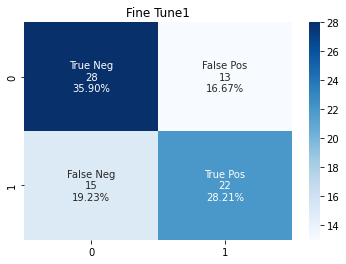

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = model.predict(X_validation_new)

#y_pred = model.predict_generator(test_generator,steps=n_pred//10,verbose=1)

labels = (pred > 0.5).astype(np.int)

conf = confusion_matrix(y_validation_new.iloc[:,0], labels[:,0])
tn, fp, fn, tp = confusion_matrix(y_validation_new.iloc[:,0], labels[:,0]).ravel()

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf.flatten()/np.sum(conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf, annot=labels, fmt='', cmap='Blues').set(title='Fine Tune1')

#### Adjusting Kernel_size

In [ ]:
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# Establish the Model Our New Function will Inform
basemodel = compile_model()

# Define the Grid Search Parameters 
kernel_number = [1, 2, 3, 4]
activation_fun1 = ['relu', 'tanh']

param_grid = dict(kernel_number=kernel_number, activation_fun1=activation_fun1)

# Call the new Model Function in the KerasClassifier Package 
model = KerasClassifier(build_fn = compile_model, verbose=0) 

# Use n_jobs=-1 to Parallelize Across Available Processors (to speed it up)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = -1)
grid = grid.fit(X_train_new, y_train_new)

# Print Best Training Results
print("Best score is {:.4f},".format(grid.best_score_),"Best parameter is {}".format(grid.best_params_))

# Summarize Training Results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{:.4f} ({:.4f}) with {}".format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best score is 0.7542, Best parameter is {'activation_fun1': 'relu', 'kernel_number': 1}
0.7542 (0.1088) with {'activation_fun1': 'relu', 'kernel_number': 1}
0.7132 (0.1372) with {'activation_fun1': 'relu', 'kernel_number': 2}
0.7163 (0.1392) with {'activation_fun1': 'relu', 'kernel_number': 3}
0.7206 (0.0774) with {'activation_fun1': 'relu', 'kernel_number': 4}
0.7144 (0.0578) with {'activation_fun1': 'tanh', 'kernel_number': 1}
0.7190 (0.0597) with {'activation_fun1': 'tanh', 'kernel_number': 2}
0.7190 (0.0766) with {'activation_fun1': 'tanh', 'kernel_number': 3}
0.6916 (0.0456) with {'activation_fun1': 'tanh', 'kernel_number': 4}


In [ ]:
model = compile_model(learn_rate = 0.01, filter_number = 32, kernel_number = 1, d_strides = (3,3), activation_fun1 = 'relu', activation_fun2 = 'tanh', d_pool_size = 2, neuron = 128)
hist = model.fit(X_train_new, y_train_new,
                    epochs=5, batch_size = 28, validation_data=(X_validation_new, y_validation_new))

Epoch 1/5
24/24 [==============================] - 3s 113ms/step - loss: 0.6260 - accuracy: 0.6413 - val_loss: 0.6496 - val_accuracy: 0.7051
Epoch 2/5
24/24 [==============================] - 4s 151ms/step - loss: 0.5378 - accuracy: 0.7614 - val_loss: 0.6645 - val_accuracy: 0.5641
Epoch 3/5
24/24 [==============================] - 3s 118ms/step - loss: 0.4846 - accuracy: 0.7857 - val_loss: 0.7189 - val_accuracy: 0.5769
Epoch 4/5
24/24 [==============================] - 4s 149ms/step - loss: 0.4805 - accuracy: 0.7812 - val_loss: 0.5591 - val_accuracy: 0.7179
Epoch 5/5
24/24 [==============================] - 3s 145ms/step - loss: 0.4831 - accuracy: 0.7720 - val_loss: 0.6480 - val_accuracy: 0.6795


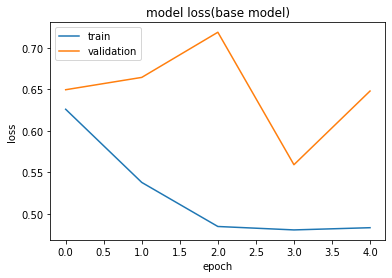

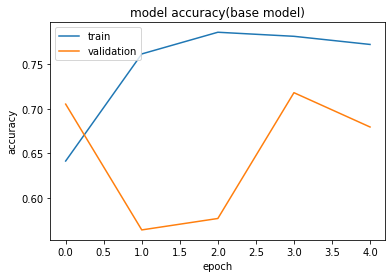

In [ ]:
import matplotlib.pyplot as plt
""" Plot the train and validation Loss """

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss(base model)')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.4,0.8)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

""" Plot the train and validation Accuracy """

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy(base model)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim(0.5,0.8)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

[Text(0.5, 1.0, 'Fine Tune2')]

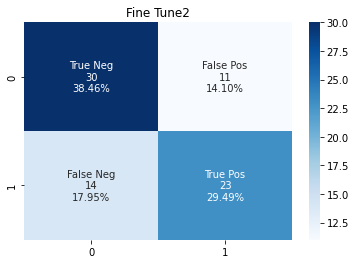

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = model.predict(X_validation_new)

#y_pred = model.predict_generator(test_generator,steps=n_pred//10,verbose=1)

labels = (pred > 0.5).astype(np.int)

conf = confusion_matrix(y_validation_new.iloc[:,0], labels[:,0])
tn, fp, fn, tp = confusion_matrix(y_validation_new.iloc[:,0], labels[:,0]).ravel()

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf.flatten()/np.sum(conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf, annot=labels, fmt='', cmap='Blues').set(title='Fine Tune2')

#### Adjusting number of filters

In [ ]:
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# Establish the Model Our New Function will Inform
basemodel = compile_model()

# Define the Grid Search Parameters 
filter_number = [8, 16, 32, 48, 64]
activation_fun1 = ['relu', 'tanh']

param_grid = dict(filter_number=filter_number, activation_fun1=activation_fun1)

# Call the new Model Function in the KerasClassifier Package 
model = KerasClassifier(build_fn = compile_model, verbose=0) 

# Use n_jobs=-1 to Parallelize Across Available Processors (to speed it up)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = -1)
grid = grid.fit(X_train_new, y_train_new)

# Print Best Training Results
print("Best score is {:.4f},".format(grid.best_score_),"Best parameter is {}".format(grid.best_params_))

# Summarize Training Results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{:.4f} ({:.4f}) with {}".format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best score is 0.7420, Best parameter is {'activation_fun1': 'relu', 'filter_number': 48}
0.6856 (0.0993) with {'activation_fun1': 'relu', 'filter_number': 8}
0.6870 (0.0412) with {'activation_fun1': 'relu', 'filter_number': 16}
0.7086 (0.1092) with {'activation_fun1': 'relu', 'filter_number': 32}
0.7420 (0.0913) with {'activation_fun1': 'relu', 'filter_number': 48}
0.7101 (0.1020) with {'activation_fun1': 'relu', 'filter_number': 64}
0.7283 (0.0937) with {'activation_fun1': 'tanh', 'filter_number': 8}
0.7069 (0.0836) with {'activation_fun1': 'tanh', 'filter_number': 16}
0.6869 (0.0540) with {'activation_fun1': 'tanh', 'filter_number': 32}
0.7192 (0.0924) with {'activation_fun1': 'tanh', 'filter_number': 48}
0.7358 (0.0724) with {'activation_fun1': 'tanh', 'filter_number': 64}


**Note: This set of parameters is best in the fine-tuning process**

In [ ]:
model = compile_model(learn_rate = 0.01, filter_number = 48, kernel_number = 1, d_strides = (3,3), activation_fun1 = 'relu', activation_fun2 = 'tanh', d_pool_size = 2, neuron = 128)
hist = model.fit(X_train_new, y_train_new,
                    epochs=10, batch_size = 28, validation_data=(X_validation_new, y_validation_new))

Epoch 1/10
24/24 [==============================] - 6s 205ms/step - loss: 0.5998 - accuracy: 0.6702 - val_loss: 0.6612 - val_accuracy: 0.5897
Epoch 2/10
24/24 [==============================] - 3s 143ms/step - loss: 0.5048 - accuracy: 0.7644 - val_loss: 0.6093 - val_accuracy: 0.6282
Epoch 3/10
24/24 [==============================] - 3s 132ms/step - loss: 0.5239 - accuracy: 0.7432 - val_loss: 0.6021 - val_accuracy: 0.6923
Epoch 4/10
24/24 [==============================] - 3s 133ms/step - loss: 0.4982 - accuracy: 0.7796 - val_loss: 0.6208 - val_accuracy: 0.6795
Epoch 5/10
24/24 [==============================] - 3s 133ms/step - loss: 0.4525 - accuracy: 0.8040 - val_loss: 0.7607 - val_accuracy: 0.6026
Epoch 6/10
24/24 [==============================] - 3s 133ms/step - loss: 0.4793 - accuracy: 0.7720 - val_loss: 0.6092 - val_accuracy: 0.6282
Epoch 7/10
24/24 [==============================] - 3s 133ms/step - loss: 0.4450 - accuracy: 0.7979 - val_loss: 0.6342 - val_accuracy: 0.7051
Epoch 

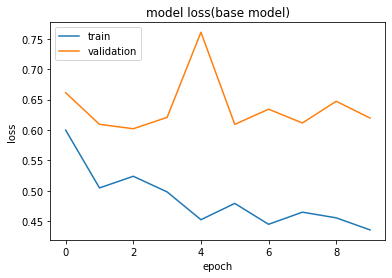

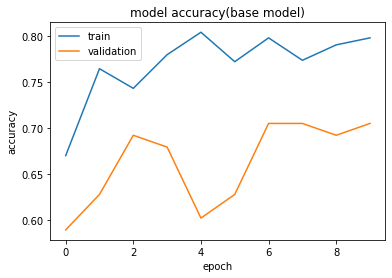

In [ ]:
import matplotlib.pyplot as plt
""" Plot the train and validation Loss """

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss(base model)')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.4,0.8)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

""" Plot the train and validation Accuracy """

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy(base model)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim(0.5,0.8)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

[Text(0.5, 1.0, 'Fine Tune')]

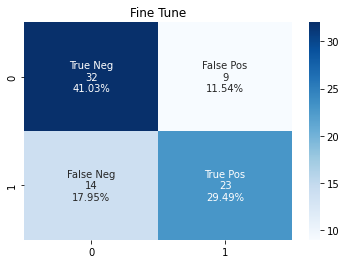

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = model.predict(X_validation_new)

#y_pred = model.predict_generator(test_generator,steps=n_pred//10,verbose=1)

labels = (pred > 0.5).astype(np.int)

conf = confusion_matrix(y_validation_new.iloc[:,0], labels[:,0])
tn, fp, fn, tp = confusion_matrix(y_validation_new.iloc[:,0], labels[:,0]).ravel()

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf.flatten()/np.sum(conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf, annot=labels, fmt='', cmap='Blues').set(title='Fine Tune')

In [ ]:
model = compile_model(learn_rate = 0.01, filter_number = 48, kernel_number = 1, d_strides = (2,2), activation_fun1 = 'relu', activation_fun2 = 'tanh', d_pool_size = 2, neuron = 128)
hist = model.fit(X_train_new, y_train_new,
                    epochs=10, batch_size = 28, validation_data=(X_validation_new, y_validation_new))

Epoch 1/10
24/24 [==============================] - 7s 258ms/step - loss: 0.6583 - accuracy: 0.6261 - val_loss: 0.5637 - val_accuracy: 0.7051
Epoch 2/10
24/24 [==============================] - 6s 246ms/step - loss: 0.5954 - accuracy: 0.6702 - val_loss: 0.5534 - val_accuracy: 0.6923
Epoch 3/10
24/24 [==============================] - 8s 351ms/step - loss: 0.5113 - accuracy: 0.7477 - val_loss: 0.7046 - val_accuracy: 0.6282
Epoch 4/10
24/24 [==============================] - 7s 270ms/step - loss: 0.4603 - accuracy: 0.7842 - val_loss: 0.6560 - val_accuracy: 0.6538
Epoch 5/10
24/24 [==============================] - 6s 246ms/step - loss: 0.4457 - accuracy: 0.8070 - val_loss: 0.7569 - val_accuracy: 0.6282
Epoch 6/10
24/24 [==============================] - 6s 248ms/step - loss: 0.4488 - accuracy: 0.7872 - val_loss: 0.6502 - val_accuracy: 0.6667
Epoch 7/10
24/24 [==============================] - 6s 247ms/step - loss: 0.4388 - accuracy: 0.8176 - val_loss: 0.7331 - val_accuracy: 0.6154
Epoch 

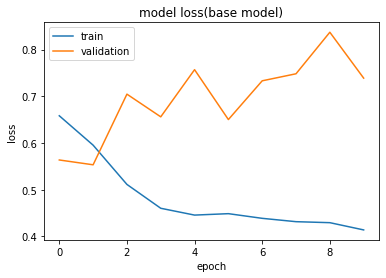

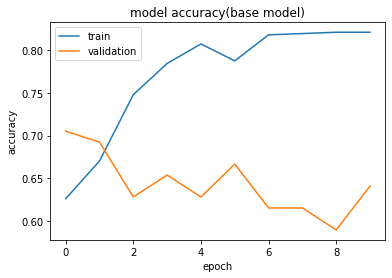

In [ ]:
import matplotlib.pyplot as plt
""" Plot the train and validation Loss """

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss(base model)')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.4,0.8)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

""" Plot the train and validation Accuracy """

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy(base model)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim(0.5,0.8)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

[Text(0.5, 1.0, 'Fine Tune')]

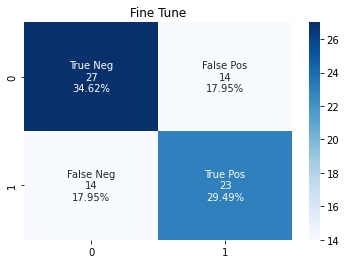

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = model.predict(X_validation_new)

#y_pred = model.predict_generator(test_generator,steps=n_pred//10,verbose=1)

labels = (pred > 0.5).astype(np.int)

conf = confusion_matrix(y_validation_new.iloc[:,0], labels[:,0])
tn, fp, fn, tp = confusion_matrix(y_validation_new.iloc[:,0], labels[:,0]).ravel()

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf.flatten()/np.sum(conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf, annot=labels, fmt='', cmap='Blues').set(title='Fine Tune')

### Pooling Method

#### Adjusing strides

In [ ]:
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# Establish the Model Our New Function will Inform
basemodel = compile_model()

# Define the Grid Search Parameters 
d_strides = [(1,1), (2,2) ,(3,3), (4,4)]
activation_fun1 = ['relu', 'tanh']

param_grid = dict(d_strides=d_strides, activation_fun1=activation_fun1)

# Call the new Model Function in the KerasClassifier Package 
model = KerasClassifier(build_fn = compile_model, verbose=0) 

# Use n_jobs=-1 to Parallelize Across Available Processors (to speed it up)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = -1)
grid = grid.fit(X_train_new, y_train_new)

# Print Best Training Results
print("Best score is {:.4f},".format(grid.best_score_),"Best parameter is {}".format(grid.best_params_))

# Summarize Training Results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{:.4f} ({:.4f}) with {}".format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best score is 0.7496, Best parameter is {'activation_fun1': 'relu', 'd_strides': (2, 2)}
0.7343 (0.0881) with {'activation_fun1': 'relu', 'd_strides': (1, 1)}
0.7496 (0.1080) with {'activation_fun1': 'relu', 'd_strides': (2, 2)}
0.7085 (0.0966) with {'activation_fun1': 'relu', 'd_strides': (3, 3)}
0.6901 (0.0417) with {'activation_fun1': 'relu', 'd_strides': (4, 4)}
0.7253 (0.1036) with {'activation_fun1': 'tanh', 'd_strides': (1, 1)}
0.7404 (0.0851) with {'activation_fun1': 'tanh', 'd_strides': (2, 2)}
0.7207 (0.0915) with {'activation_fun1': 'tanh', 'd_strides': (3, 3)}
0.6856 (0.0703) with {'activation_fun1': 'tanh', 'd_strides': (4, 4)}


### full connection

#### Adjusting number of neros

In [ ]:
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# Establish the Model Our New Function will Inform
basemodel = compile_model()

# Define the Grid Search Parameters 
neuron = [32, 64, 128, 256]
activation_fun1 = ['relu', 'tanh']

param_grid = dict(neuron=neuron, activation_fun1=activation_fun1)

# Call the new Model Function in the KerasClassifier Package 
model = KerasClassifier(build_fn = compile_model, verbose=0) 

# Use n_jobs=-1 to Parallelize Across Available Processors (to speed it up)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = -1)
grid = grid.fit(X_train_new, y_train_new)

# Print Best Training Results
print("Best score is {:.4f},".format(grid.best_score_),"Best parameter is {}".format(grid.best_params_))

# Summarize Training Results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{:.4f} ({:.4f}) with {}".format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best score is 0.7542, Best parameter is {'activation_fun1': 'relu', 'neuron': 256}
0.6810 (0.0682) with {'activation_fun1': 'relu', 'neuron': 32}
0.6780 (0.0665) with {'activation_fun1': 'relu', 'neuron': 64}
0.7008 (0.0676) with {'activation_fun1': 'relu', 'neuron': 128}
0.7542 (0.1018) with {'activation_fun1': 'relu', 'neuron': 256}
0.7466 (0.1130) with {'activation_fun1': 'tanh', 'neuron': 32}
0.7175 (0.0766) with {'activation_fun1': 'tanh', 'neuron': 64}
0.7069 (0.0710) with {'activation_fun1': 'tanh', 'neuron': 128}
0.7114 (0.0709) with {'activation_fun1': 'tanh', 'neuron': 256}


In [ ]:
model = compile_model(learn_rate = 0.01, filter_number = 48, kernel_number = 1, d_strides = (2,2), activation_fun1 = 'relu', activation_fun2 = 'tanh', d_pool_size = 2, neuron = 256)
hist = model.fit(X_train_new, y_train_new,
                    epochs=10, batch_size = 28, validation_data=(X_validation_new, y_validation_new))

Epoch 1/10
24/24 [==============================] - 7s 272ms/step - loss: 0.7158 - accuracy: 0.6033 - val_loss: 0.7243 - val_accuracy: 0.6795
Epoch 2/10
24/24 [==============================] - 6s 260ms/step - loss: 0.5745 - accuracy: 0.7097 - val_loss: 0.6095 - val_accuracy: 0.6026
Epoch 3/10
24/24 [==============================] - 6s 266ms/step - loss: 0.5165 - accuracy: 0.7614 - val_loss: 0.8259 - val_accuracy: 0.5513
Epoch 4/10
24/24 [==============================] - 6s 261ms/step - loss: 0.4863 - accuracy: 0.7812 - val_loss: 0.6292 - val_accuracy: 0.6538
Epoch 5/10
24/24 [==============================] - 6s 264ms/step - loss: 0.4467 - accuracy: 0.8055 - val_loss: 0.7249 - val_accuracy: 0.5897
Epoch 6/10
24/24 [==============================] - 6s 259ms/step - loss: 0.4292 - accuracy: 0.8131 - val_loss: 0.7245 - val_accuracy: 0.6667
Epoch 7/10
24/24 [==============================] - 6s 261ms/step - loss: 0.4046 - accuracy: 0.8267 - val_loss: 0.6124 - val_accuracy: 0.7179
Epoch 

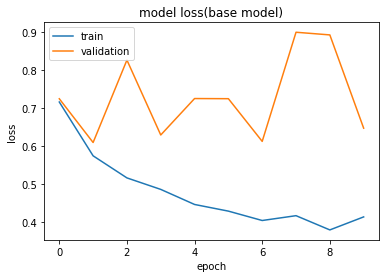

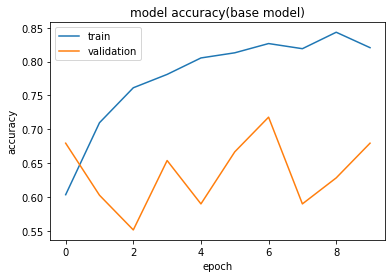

In [ ]:
import matplotlib.pyplot as plt
""" Plot the train and validation Loss """

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss(base model)')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.4,0.8)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

""" Plot the train and validation Accuracy """

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy(base model)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim(0.5,0.8)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

[Text(0.5, 1.0, 'Fine Tune')]

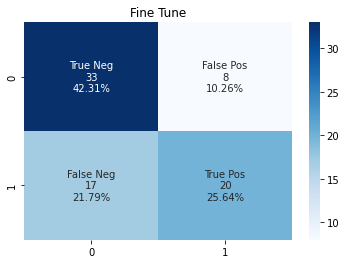

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = model.predict(X_validation_new)

#y_pred = model.predict_generator(test_generator,steps=n_pred//10,verbose=1)

labels = (pred > 0.5).astype(np.int)

conf = confusion_matrix(y_validation_new.iloc[:,0], labels[:,0])
tn, fp, fn, tp = confusion_matrix(y_validation_new.iloc[:,0], labels[:,0]).ravel()

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf.flatten()/np.sum(conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf, annot=labels, fmt='', cmap='Blues').set(title='Fine Tune')